# **Visualisierung unseres Datensatzes auf verschiedene Arten**

In [9]:
!pip install pandas matplotlib seaborn wordcloud



zsh:1: command not found: pip


### Alle Parteien werden in einem Tortendiagramm dargestellt und in % angezeigt

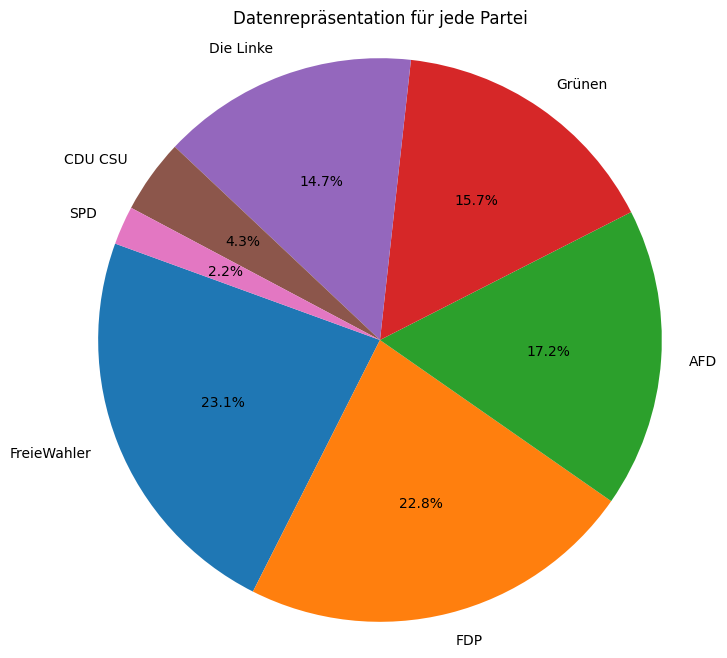

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Daten.csv')

parties = df['Partei'].value_counts()
party_proz = parties / parties.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(party_proz, labels=party_proz.index, autopct='%1.1f%%', startangle=160)
plt.title("Datenrepräsentation für jede Partei")
plt.axis('equal')
plt.show()


##  Visualisierung der häufigsten Wörter mit der Word-Cloud-Bibliothek.

###  Word Cloud für Meinungen

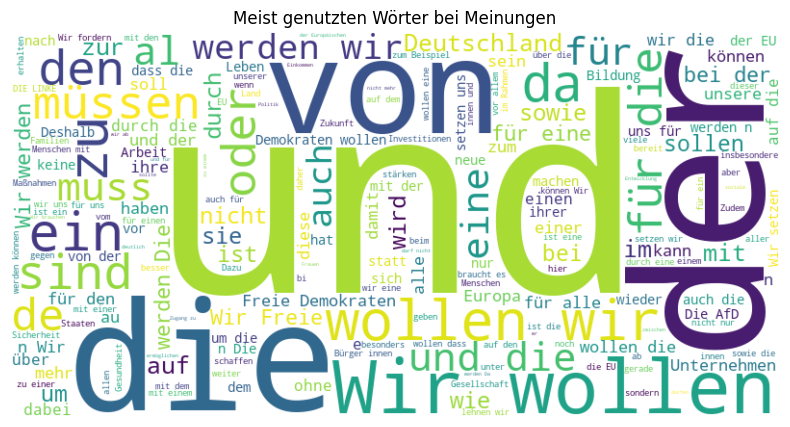

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

t_meinung = " ".join(meinung for meinung in df['Meinung'].dropna())
wc_meinung = WordCloud(width=800, height=400, background_color='white').generate(t_meinung)

plt.figure(figsize=(10, 5))
plt.imshow(wc_meinung, interpolation='bilinear')
plt.axis("off")
plt.title("Meist genutzten Wörter bei Meinungen")
plt.show()


### Word Cloud für Thema

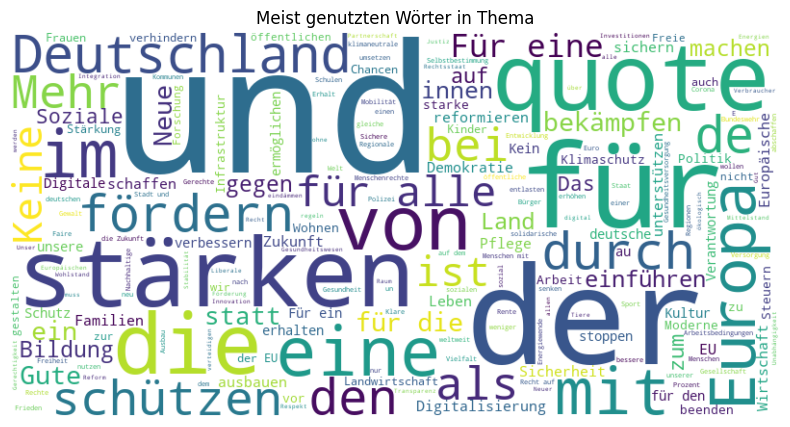

In [3]:
te_thema = " ".join(thema for thema in df['Thema'].dropna())
wc_thema = WordCloud(width=800, height=400, background_color='white').generate(te_thema)

plt.figure(figsize=(10, 5))
plt.imshow(wc_thema, interpolation='bilinear')
plt.axis("off")
plt.title("Meist genutzten Wörter in Thema")
plt.show()

## Diagramm der Wortlänge (Meinung) – da es sehr lange Texte enthält.

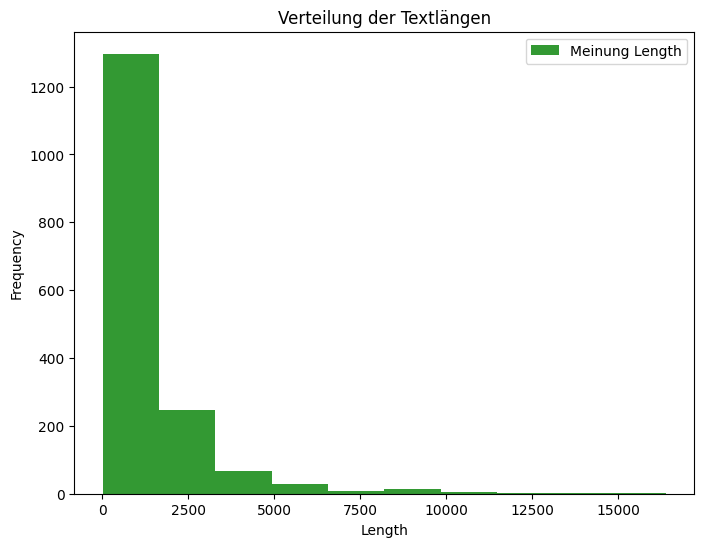

In [4]:
df['Meinung_Length'] = df['Meinung'].dropna().apply(len)

plt.figure(figsize=(8, 6))
plt.hist(df['Meinung_Length'], bins=10, alpha=0.8, label='Meinung Length', color='green')
plt.title("Verteilung der Textlängen")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## Sentiment Analysis

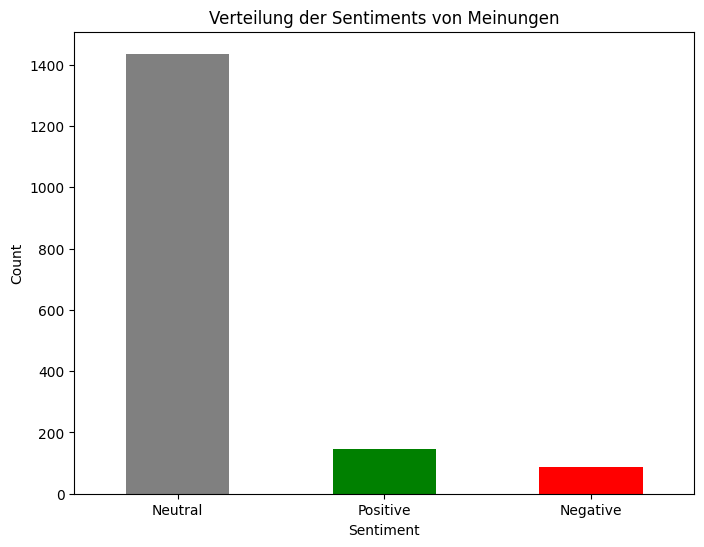

In [6]:
from textblob import TextBlob

df['Sentiment'] = df['Meinung'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

sentiment_labels = pd.cut(df['Sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

sentiment_counts = sentiment_labels.value_counts()

sentiment_counts.plot(kind='bar', color=['grey', 'green', 'red'], figsize=(8, 6))
plt.title("Verteilung der Sentiments von Meinungen")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


## Häufigkeit von Schlüsselwörtern in den Wahlprogrammen

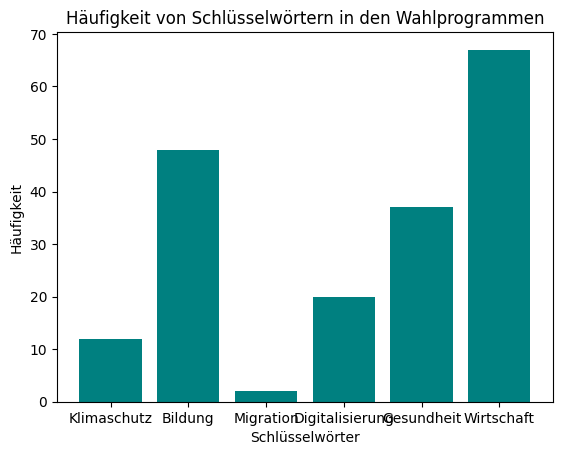

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [5]:
keywords = ['Klimaschutz', 'Bildung', 'Migration', 'Digitalisierung', 'Gesundheit', 'Wirtschaft']
keyword_counts = {keyword: df['Thema'].str.contains(keyword, case=False, na=False).sum() for keyword in keywords}

#Balkendiagramm
plt.bar(keyword_counts.keys(), keyword_counts.values(), color='teal')
plt.title('Häufigkeit von Schlüsselwörtern in den Wahlprogrammen')
plt.xlabel('Schlüsselwörter')
plt.ylabel('Häufigkeit')
plt.show()

plt.figure(figsize=(15, 15))
